In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib

from MieSppForce import frenel, dipoles, green_func, force

In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl=800
dist = 2
STOP=45
angle=25*np.pi/180
phase=0
a_angle = np.pi/4

R = np.linspace(50,120,60)
F_x = np.empty((len(R), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

  0%|          | 0/60 [00:00<?, ?it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [00:56<00:00,  1.07it/s]


In [4]:
P,M = np.empty((len(R),3), dtype=complex),np.empty((len(R),3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0, dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

100%|██████████| 60/60 [00:00<00:00, 2905.55it/s]


In [5]:
dyGE_yz = np.zeros(len(R), dtype=complex)
dyGH_yz,dyrotGHxz,dyrotGHzx = np.empty_like(dyGE_yz),  np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)

for i in tqdm(range(len(R))):
    z0=dist+R[i]
    dyGE, dyGH = green_func.dy_green_E_H(wl, z0, eps_Au, STOP)
    dyrotGE, dyrotGH = green_func.dy_rot_green_E_H(wl, z0, eps_Au, STOP)
    dyGE_yz[i] = dyGE[1,2]
    dyGH_yz[i] = dyGH[1,2]
    dyrotGHxz = dyrotGH[0,2]
    dyrotGHzx = dyrotGH[2,0]

100%|██████████| 60/60 [00:00<00:00, 243854.88it/s]


In [6]:
GExx, GEzz, GHxx, GHzz = np.empty_like(dyGE_yz),  np.empty_like(dyGE_yz), np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)
rotGExy, rotGEyx = np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)

for i in tqdm(range(len(R))):
    z0=dist+R[i]
    GE, GH = green_func.green_ref_00(wl, z0, eps_Au, STOP)
    rotGE, _  = green_func.rot_green_ref_00(wl, z0, eps_Au, STOP)
    GExx[i] = GE[0,0]
    GEzz[i] = GE[2,2]
    GHxx[i] = GH[0,0]
    GHzz[i] = GH[2,2]

    rotGExy[i] = rotGE[0,1]
    rotGEyx[i] = rotGE[1,0]

100%|██████████| 60/60 [00:00<00:00, 301387.11it/s]


In [7]:
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7
k = 2*np.pi/wl/1e-9
omega = 2*np.pi*c_const/wl/1e-9
kz = 2*np.pi/wl * np.cos(angle)

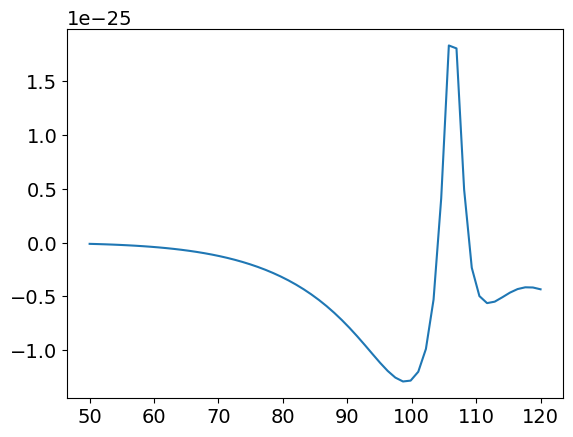

In [8]:
plt.plot(R, F_y[:,0])

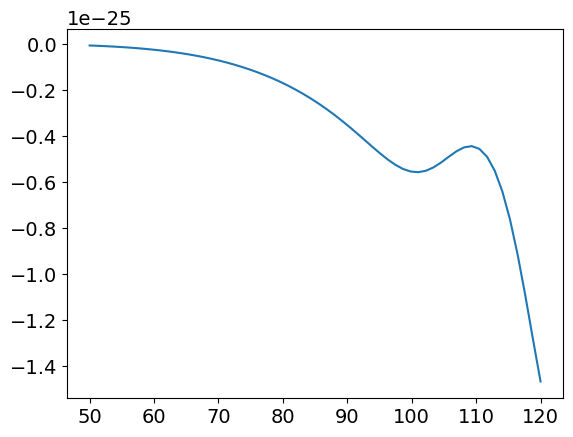

In [9]:
plt.plot(R, F_y[:,2])

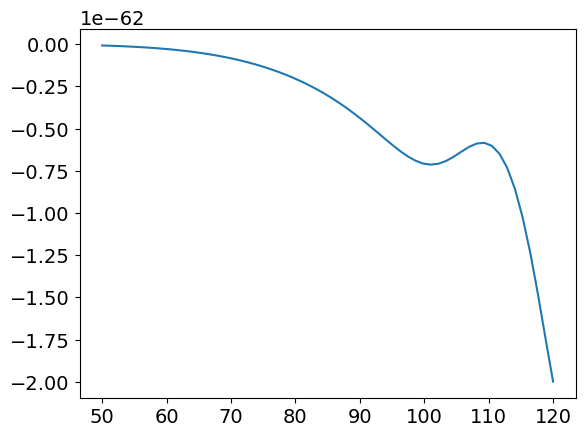

In [11]:
plt.plot(R, -np.imag(P[:,1].conj()*P[:,2]))

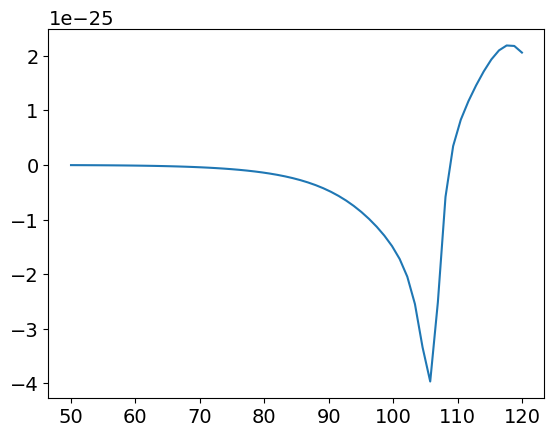

In [11]:
plt.plot(R, F_y[:,3]+F_y[:,6])

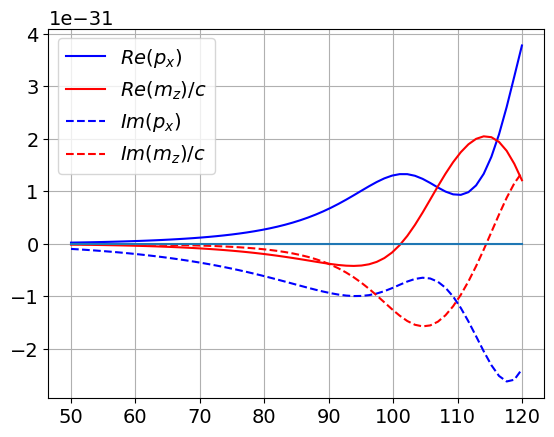

In [ ]:
plt.plot(R, np.real(P[:,0]), label='$Re(p_x)$', c='b')
plt.plot(R, np.real(M[:,1])/c_const, label='$Re(m_z)/c$', c='r')
plt.plot(R, np.imag(P[:,0]), label='$Im(p_x)$', c='b', ls='--')
plt.plot(R, np.imag(M[:,1])/c_const, label='$Im(m_z)/c$', c='r', ls='--')

plt.grid()
plt.legend()
plt.show()

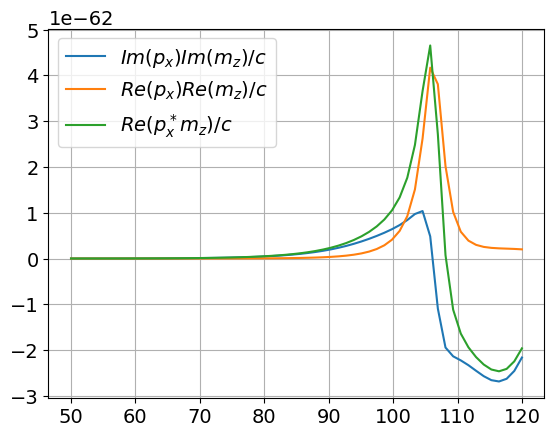

In [ ]:
plt.plot(R, np.imag(P[:,0])*np.imag(M[:,2])/c_const, label='$Im(p_x)Im(m_z)/c$')
plt.plot(R, np.real(P[:,0])*np.real(M[:,2])/c_const, label='$Re(p_x)Re(m_z)/c$')
plt.plot(R, np.real(P[:,0].conj() * M[:,2])/c_const, label='$Re(p_x^* m_z)/c$')
plt.legend()
plt.grid()
plt.show()

In [12]:
alphaE, alphaH =  np.empty_like(dyGE_yz),  np.empty_like(dyGE_yz)
r_p, r_s = frenel.reflection_coeff_v2(wl, eps_Au, angle)

for i in tqdm(range(len(R))):
    z0 = dist + R[i]
    alphaE[i], alphaH[i] = dipoles.alpha_v2(wl, R[i], eps_Si)

100%|██████████| 60/60 [00:00<00:00, 11632.00it/s]


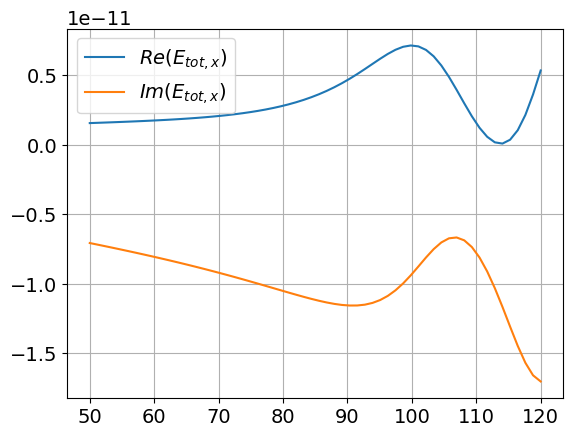

In [47]:
plt.plot(R, np.real(P[:,0]/alphaE), label='$Re(E_{tot,x})$')
plt.plot(R, np.imag(P[:,0]/alphaE), label='$Im(E_{tot,x})$')
plt.legend()
plt.grid()
plt.show()

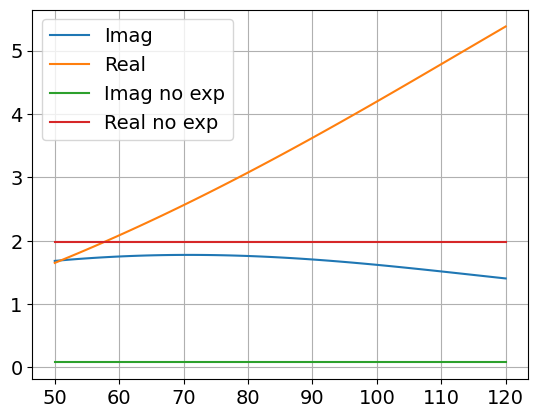

In [24]:
plt.plot(R, np.imag(1+r_s.conj() * np.exp(-2j*kz*(dist+R) - r_p * np.exp(2j*kz*(dist+R)) - r_p*r_s.conj())), label='Imag')
plt.plot(R, np.real(1+r_s.conj() * np.exp(-2j*kz*(dist+R) - r_p * np.exp(2j*kz*(dist+R)) - r_p*r_s.conj())), label='Real')
plt.plot((R[0], R[-1]) , (np.imag(1- r_p*r_s.conj()), np.imag(1- r_p*r_s.conj())), label='Imag no exp')
plt.plot((R[0], R[-1]) , (np.real(1- r_p*r_s.conj()), np.real(1- r_p*r_s.conj())), label='Real no exp')
plt.legend()
plt.grid()

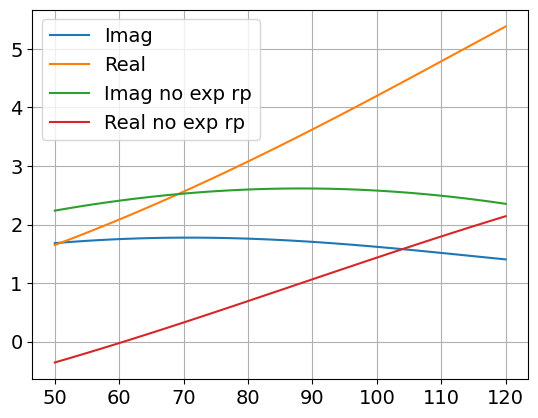

In [26]:
plt.plot(R, np.imag(1+r_s.conj() * np.exp(-2j*kz*(dist+R) - r_p * np.exp(2j*kz*(dist+R)) - r_p*r_s.conj())), label='Imag')
plt.plot(R, np.real(1+r_s.conj() * np.exp(-2j*kz*(dist+R) - r_p * np.exp(2j*kz*(dist+R)) - r_p*r_s.conj())), label='Real')

plt.plot(R, np.imag(1+r_s.conj() * np.exp(-2j*kz*(dist+R) - r_p*r_s.conj())), label='Imag no exp rp')
plt.plot(R, np.real(1+r_s.conj() * np.exp(-2j*kz*(dist+R)  - r_p*r_s.conj())), label='Real no exp rp')
# plt.plot((R[0], R[-1]) , (np.imag(1- r_p*r_s.conj()), np.imag(1- r_p*r_s.conj())), label='Imag no exp')
# plt.plot((R[0], R[-1]) , (np.real(1- r_p*r_s.conj()), np.real(1- r_p*r_s.conj())), label='Real no exp')
plt.legend()
plt.grid()

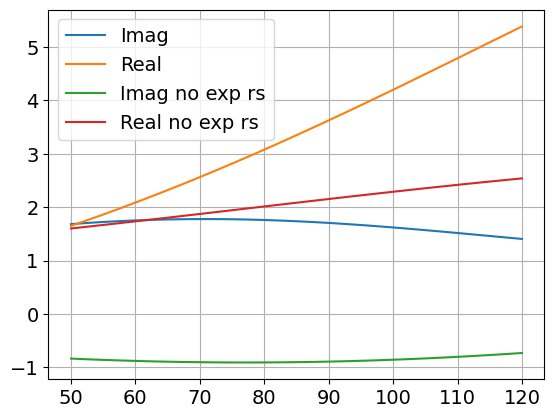

In [27]:
plt.plot(R, np.imag(1+r_s.conj() * np.exp(-2j*kz*(dist+R) - r_p * np.exp(2j*kz*(dist+R)) - r_p*r_s.conj())), label='Imag')
plt.plot(R, np.real(1+r_s.conj() * np.exp(-2j*kz*(dist+R) - r_p * np.exp(2j*kz*(dist+R)) - r_p*r_s.conj())), label='Real')

plt.plot(R, np.imag(1- r_p * np.exp(2j*kz*(dist+R)) - r_p*r_s.conj()), label='Imag no exp rs')
plt.plot(R, np.real(1- r_p * np.exp(2j*kz*(dist+R))  - r_p*r_s.conj()), label='Real no exp rs')
# plt.plot((R[0], R[-1]) , (np.imag(1- r_p*r_s.conj()), np.imag(1- r_p*r_s.conj())), label='Imag no exp')
# plt.plot((R[0], R[-1]) , (np.real(1- r_p*r_s.conj()), np.real(1- r_p*r_s.conj())), label='Real no exp')
plt.legend()
plt.grid()

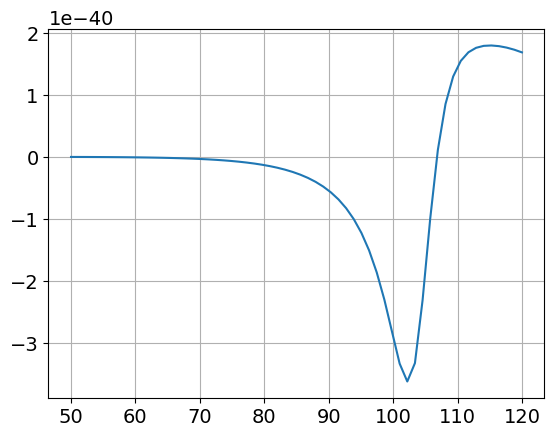

In [14]:
plt.plot(R, -np.real(alphaE * alphaH.conj()))
plt.grid()

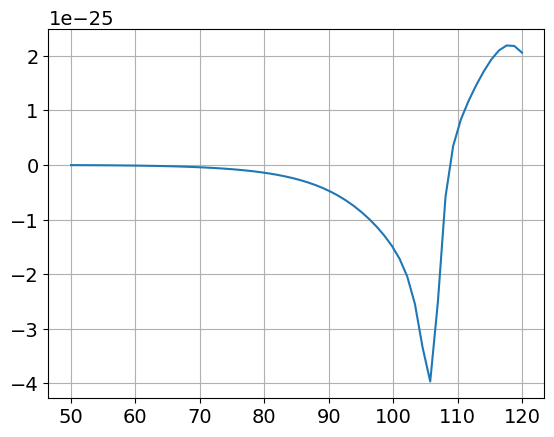

In [13]:
plt.plot(R, F_y[:,3]+F_y[:,6])
plt.grid()

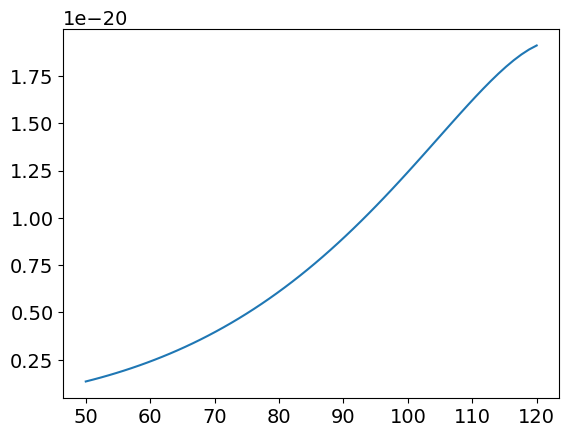

In [45]:
plt.plot(R, np.real(alphaE))

In [38]:
wls = np.linspace(400,1000,100)

def RP(eps_Au, angle):
    return lambda wl: frenel.reflection_coeff_v2(wl, eps_Au, angle)[0]


def RS(eps_Au, angle):
    return lambda wl: frenel.reflection_coeff_v2(wl, eps_Au, angle)[1]

def KZ(angle):
    return lambda wl: 2*np.pi/wl *np.cos(angle)

RPP = RP(eps_Au, angle)
RSS = RS(eps_Au, angle)
KZZ = KZ(angle)

z0 = 110 + 2

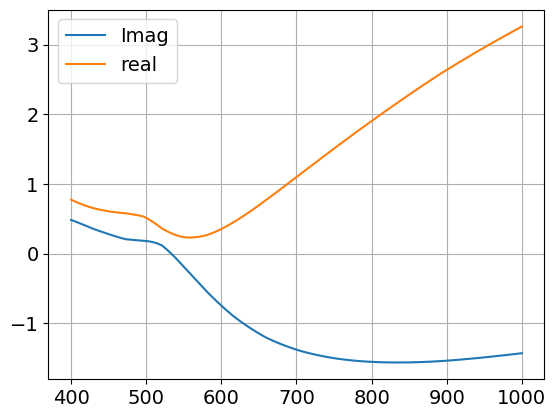

In [39]:
plt.plot(wls, np.imag(1+RPP(wls).conj() * np.exp(-2j*KZZ(wls)*z0 - RSS(wls)* np.exp(2j*KZZ(wls)*z0) - RPP(wls)*RSS(wls).conj())), label='Imag')
plt.plot(wls, np.real(1+RPP(wls).conj() * np.exp(-2j*KZZ(wls)*z0 - RSS(wls)* np.exp(2j*KZZ(wls)*z0) - RPP(wls)*RSS(wls).conj())), label='real')
plt.grid()
plt.legend()


# В зависимости от длины волны!

## Fe1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib

from MieSppForce import frenel, dipoles, green_func, force

In [3]:
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

In [23]:
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

R = 110
dist = 2
a_angle = np.pi/4
phase=0
STOP=45
angle=25*np.pi/180
point = [0,0,dist+R]

z0 = point[2]

wls=np.linspace(400,1100,60)



In [65]:

F_x = np.empty((len(wls), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

 88%|████████▊ | 53/60 [00:18<00:02,  2.74it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [00:20<00:00,  2.86it/s]


In [66]:
P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)
for i in tqdm(range(len(wls))):
    p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

100%|██████████| 60/60 [00:00<00:00, 894.93it/s]


In [7]:
F_z_air = np.empty(len(wls))

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], 1, point, R, eps_Si, 0,amplitude=1,phase=0,a_angle=0, stop=STOP, full_output=False)
    F_z_air[i] = f[2]

F0 = np.max(np.abs(F_z_air))

100%|██████████| 60/60 [00:00<00:00, 91.15it/s]


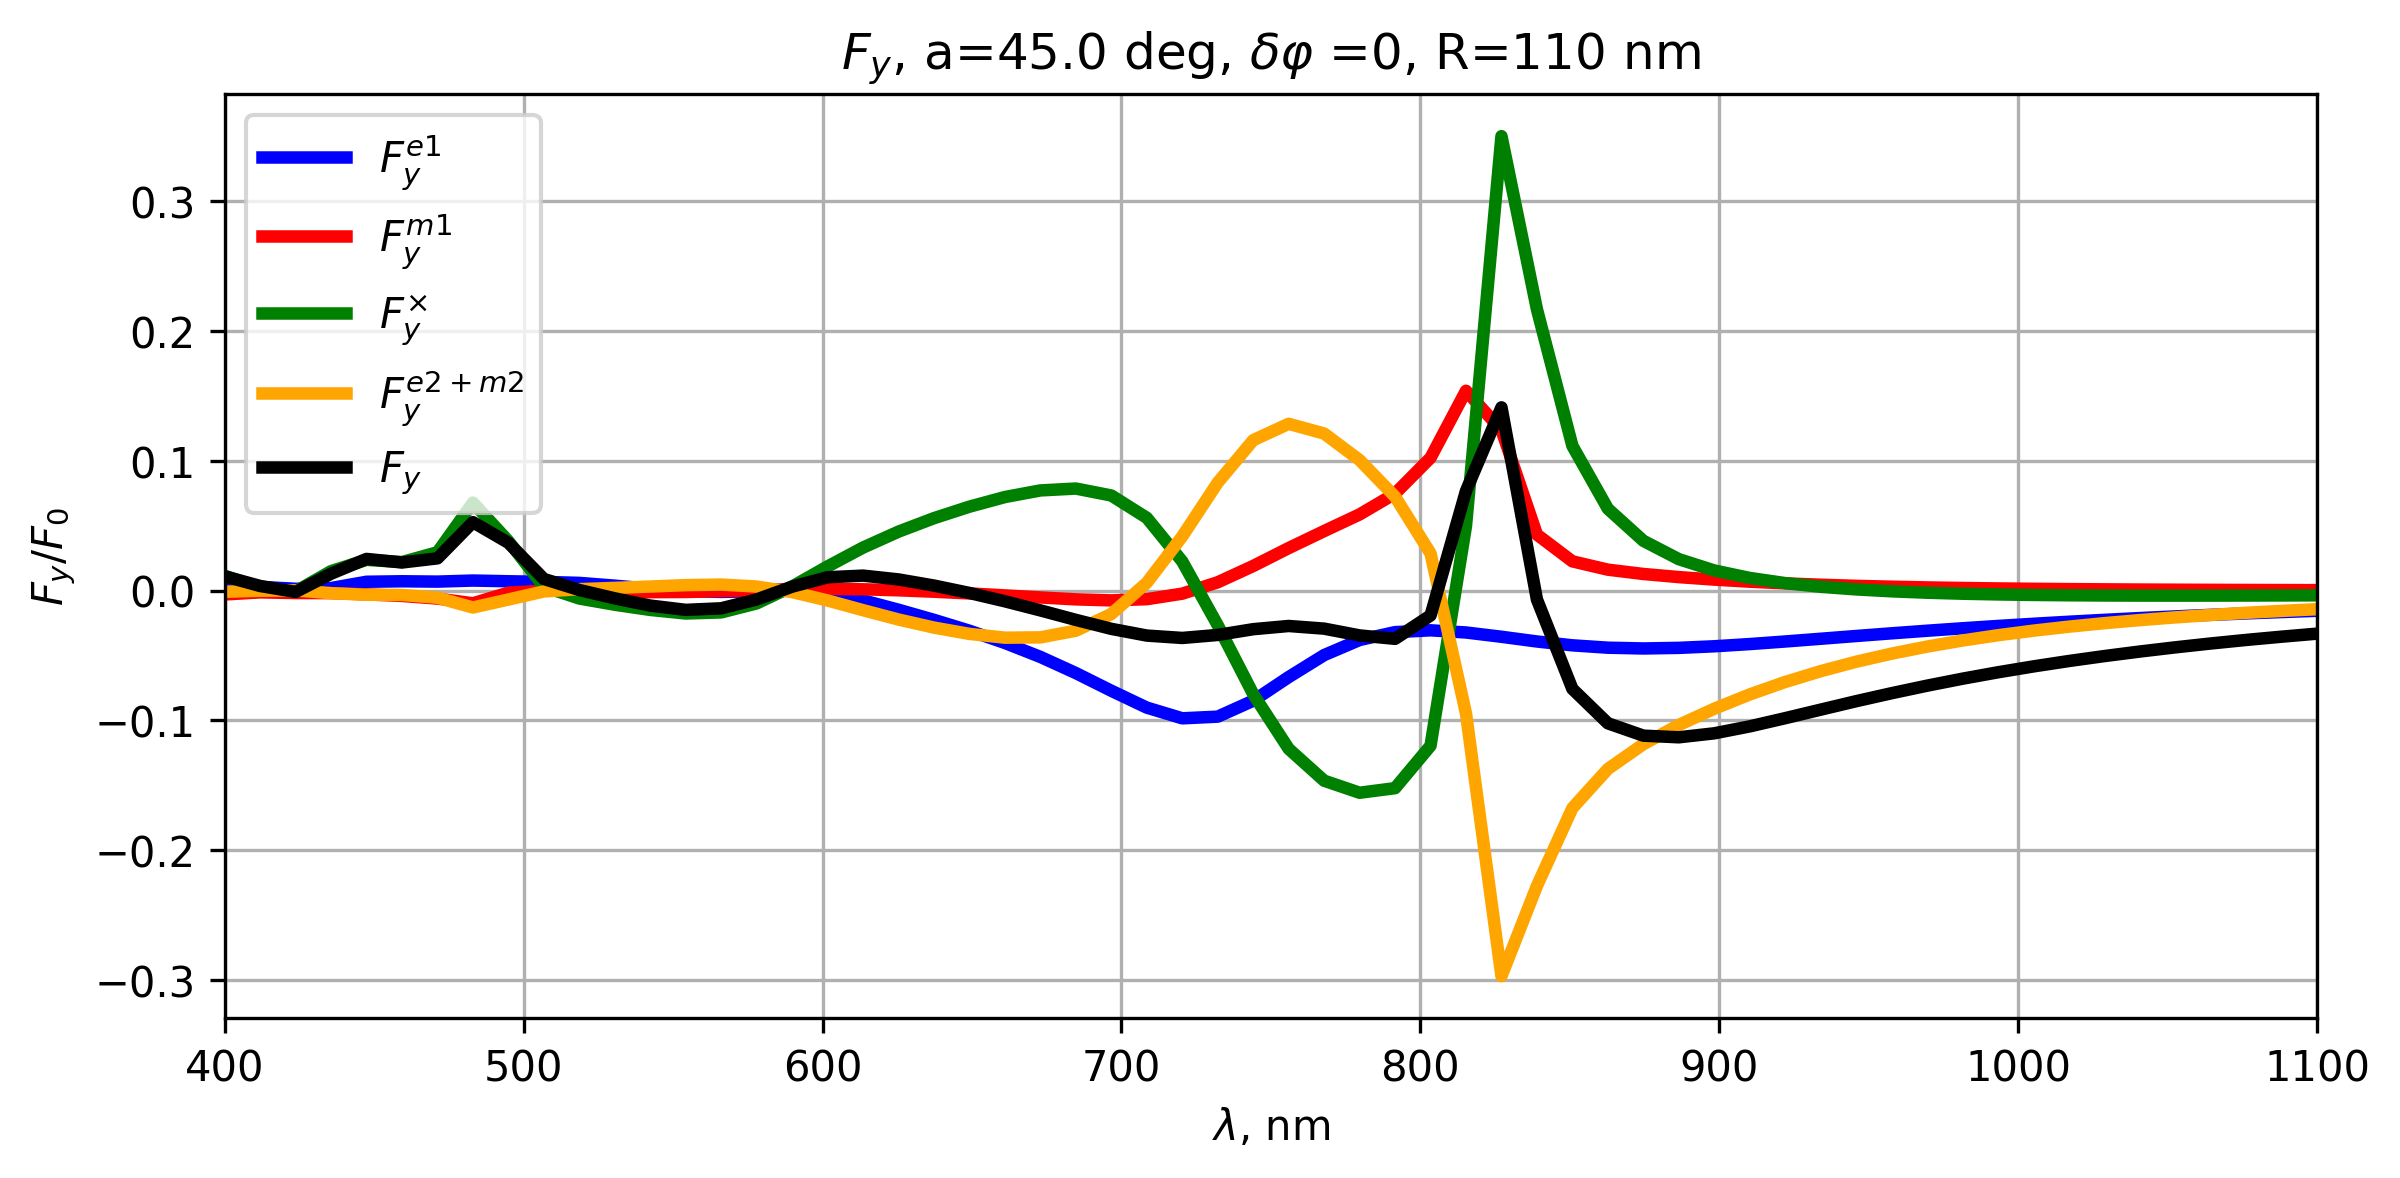

In [67]:
labels = ['$F_y$', '$F_y^{e0}$', '$F_y^{e1}$', '$F_y^{e2}$', '$F_y^{m0}$', '$F_y^{m1}$', '$F_y^{m2}$', '$F_y^{\\times}$']

c = ['black', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'g']

selected_components = [2,5,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(9, 4), dpi=300)


for i, comp in enumerate(selected_components):
    plt.plot(wls, F_y[:, comp]/F0, label=labels[comp], lw=3, c=c[comp])
    
plt.plot(wls, (F_y[:, 3]+F_y[:,6])/F0, label='$F_y^{e2+m2}$', lw=3, c='orange')

# plt.plot(wls, (F_y[:, 5]+F_y[:,6])/F0, label='$F_y^m$', lw=3, c='r')

# plt.plot(wls, F_y[:, 7]/F0, label='$F_y^{\\times}$', lw=3, c='g')

plt.plot(wls, F_y[:, 0]/F0, label='$F_y$', lw=3, c=c[0])

plt.xlabel('$\lambda$, nm')
plt.ylabel('$F_y / F_0$')
plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(wls[0], wls[-1])
#plt.savefig(f'Fy_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_R_comp_2.pdf')
plt.show()

In [68]:
def AlphaE(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[0]
def AlphaH(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[1]

AlphaEE = AlphaE(R, eps_Si)
AlphaHH = AlphaH(R, eps_Si)


# plt.plot(wls, np.real(AlphaEE(wls)))

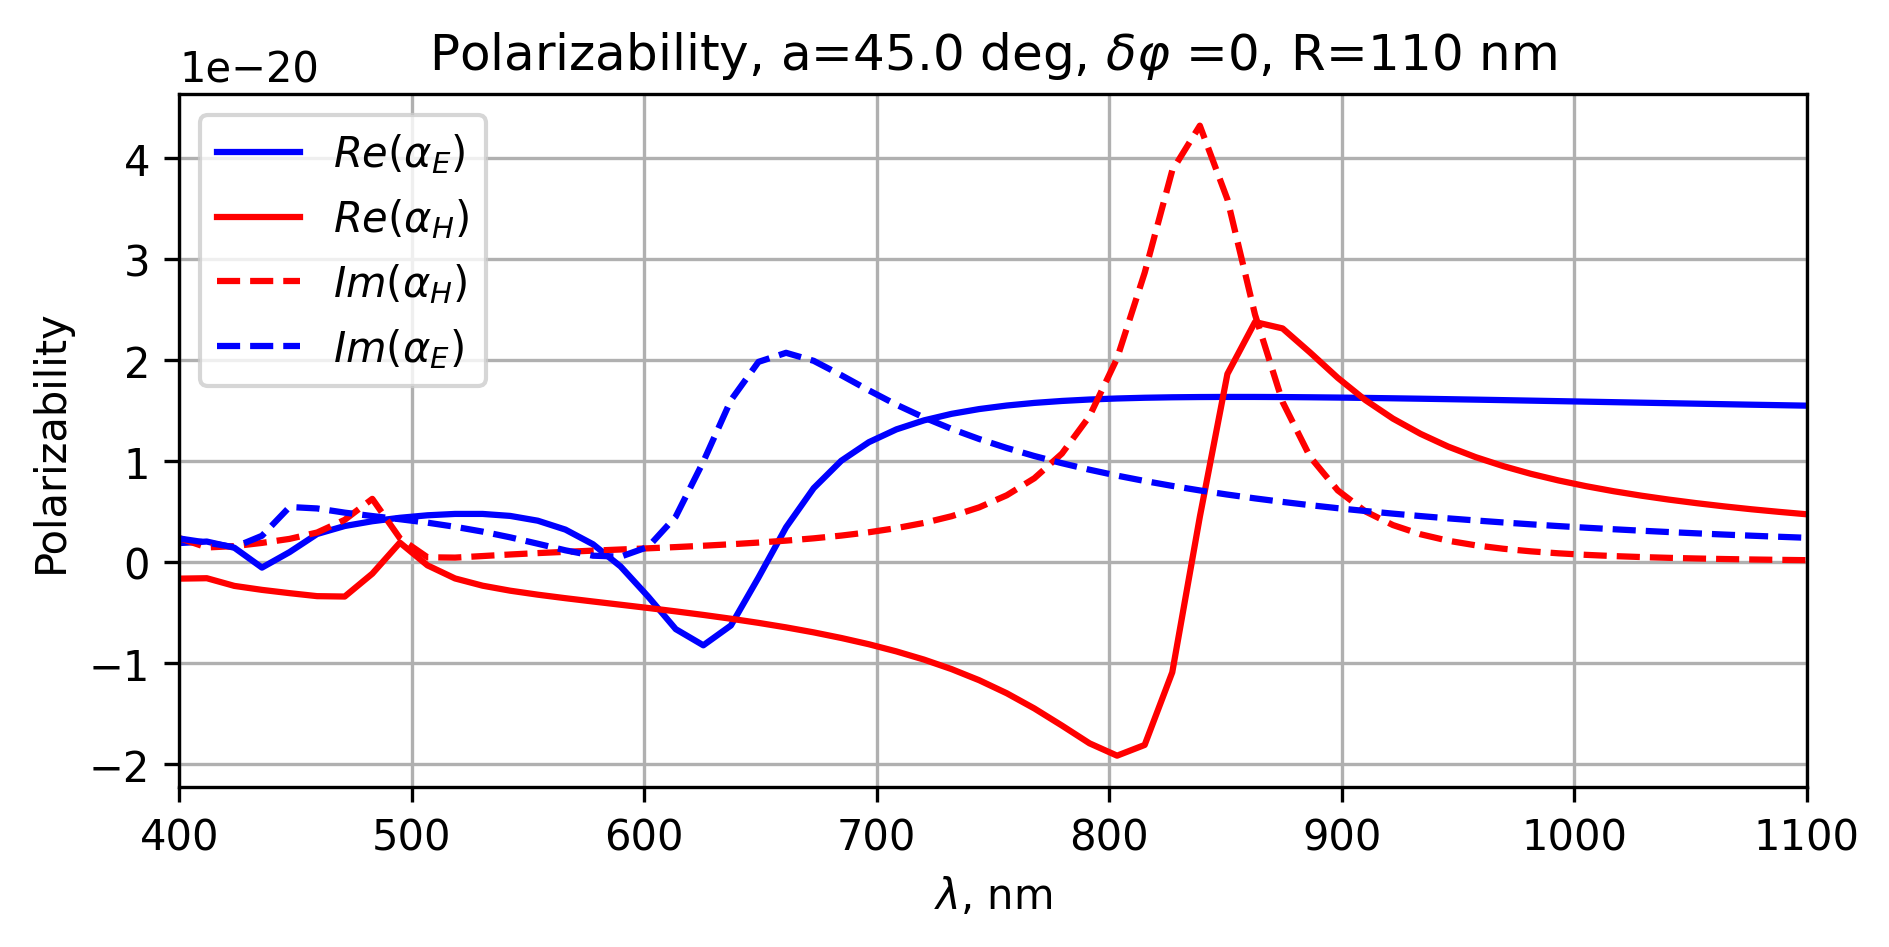

In [69]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.real(AlphaEE(wls)), label='$Re(\\alpha_E)$', c='b')
plt.plot(wls, np.real(AlphaHH(wls)), label='$Re(\\alpha_H)$', c='r')
plt.plot(wls, np.imag(AlphaHH(wls)), label='$Im(\\alpha_H)$' , c='r', ls='--')
plt.plot(wls, np.imag(AlphaEE(wls)), label='$Im(\\alpha_E)$', c='b', ls='--')
plt.xlabel('$\lambda$, nm')
plt.ylabel('Polarizability')
plt.title(f'Polarizability, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(wls[0], wls[-1])
plt.show()


Text(0.5, 0, '$\\lambda$, nm')

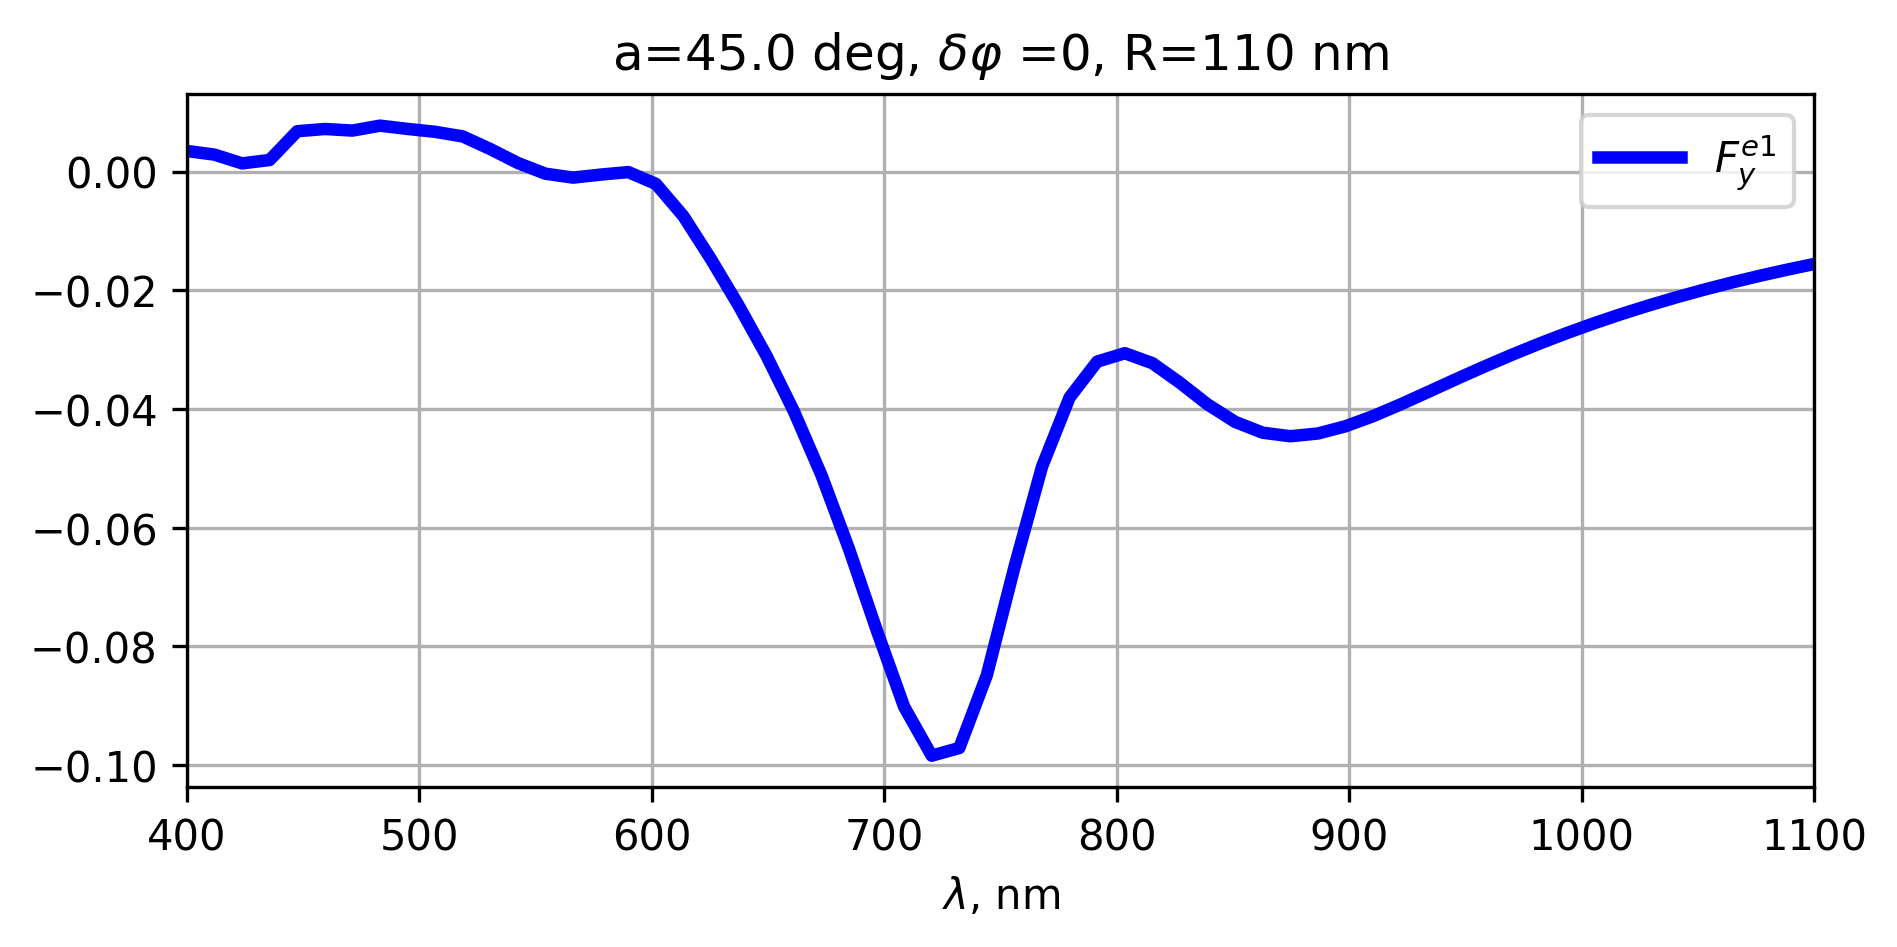

In [70]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, F_y[:,2]/F0, label='$F_y^{e1}$', lw=3, c='blue')
plt.legend()
plt.xlim(wls[0], wls[-1])
plt.grid()
plt.title(f'a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.xlabel('$\lambda$, nm')

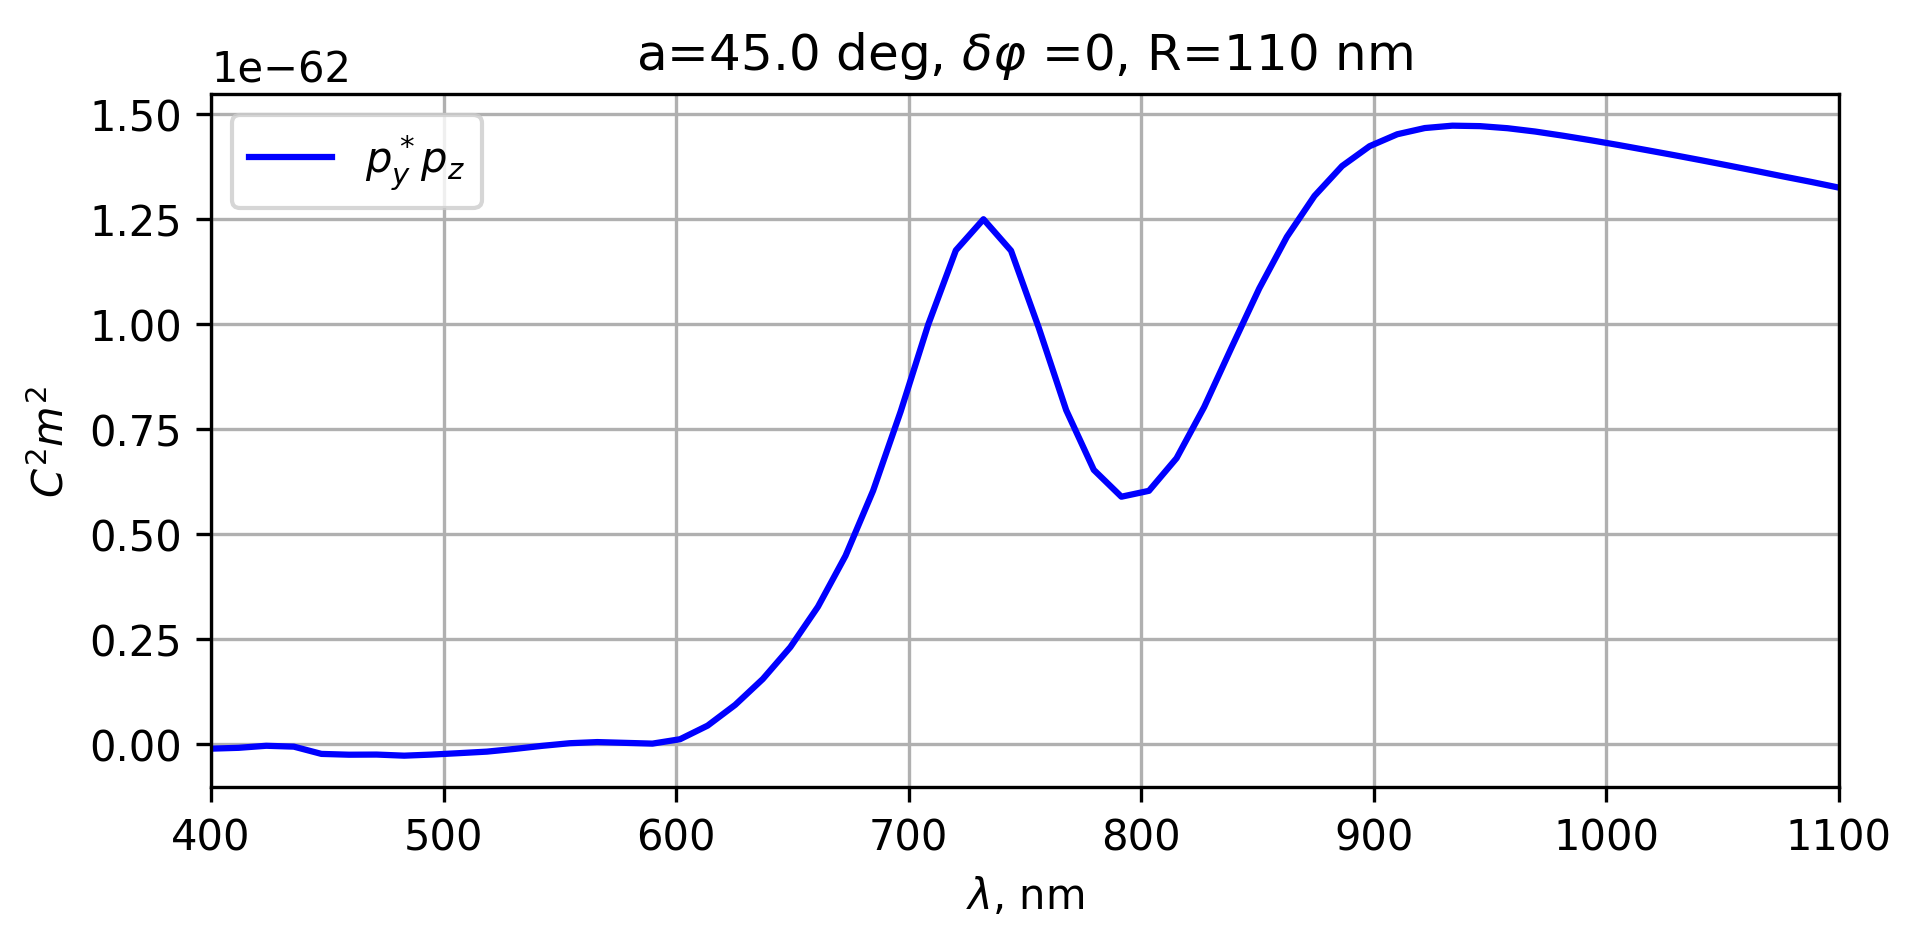

In [71]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.imag(P[:,1].conj()*P[:,2]), label='$p_y^* p_z$', c='b')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$C^2 m^2$')
plt.title(f'a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.legend(loc="upper left")
plt.xlim(wls[0], wls[-1])
plt.show()


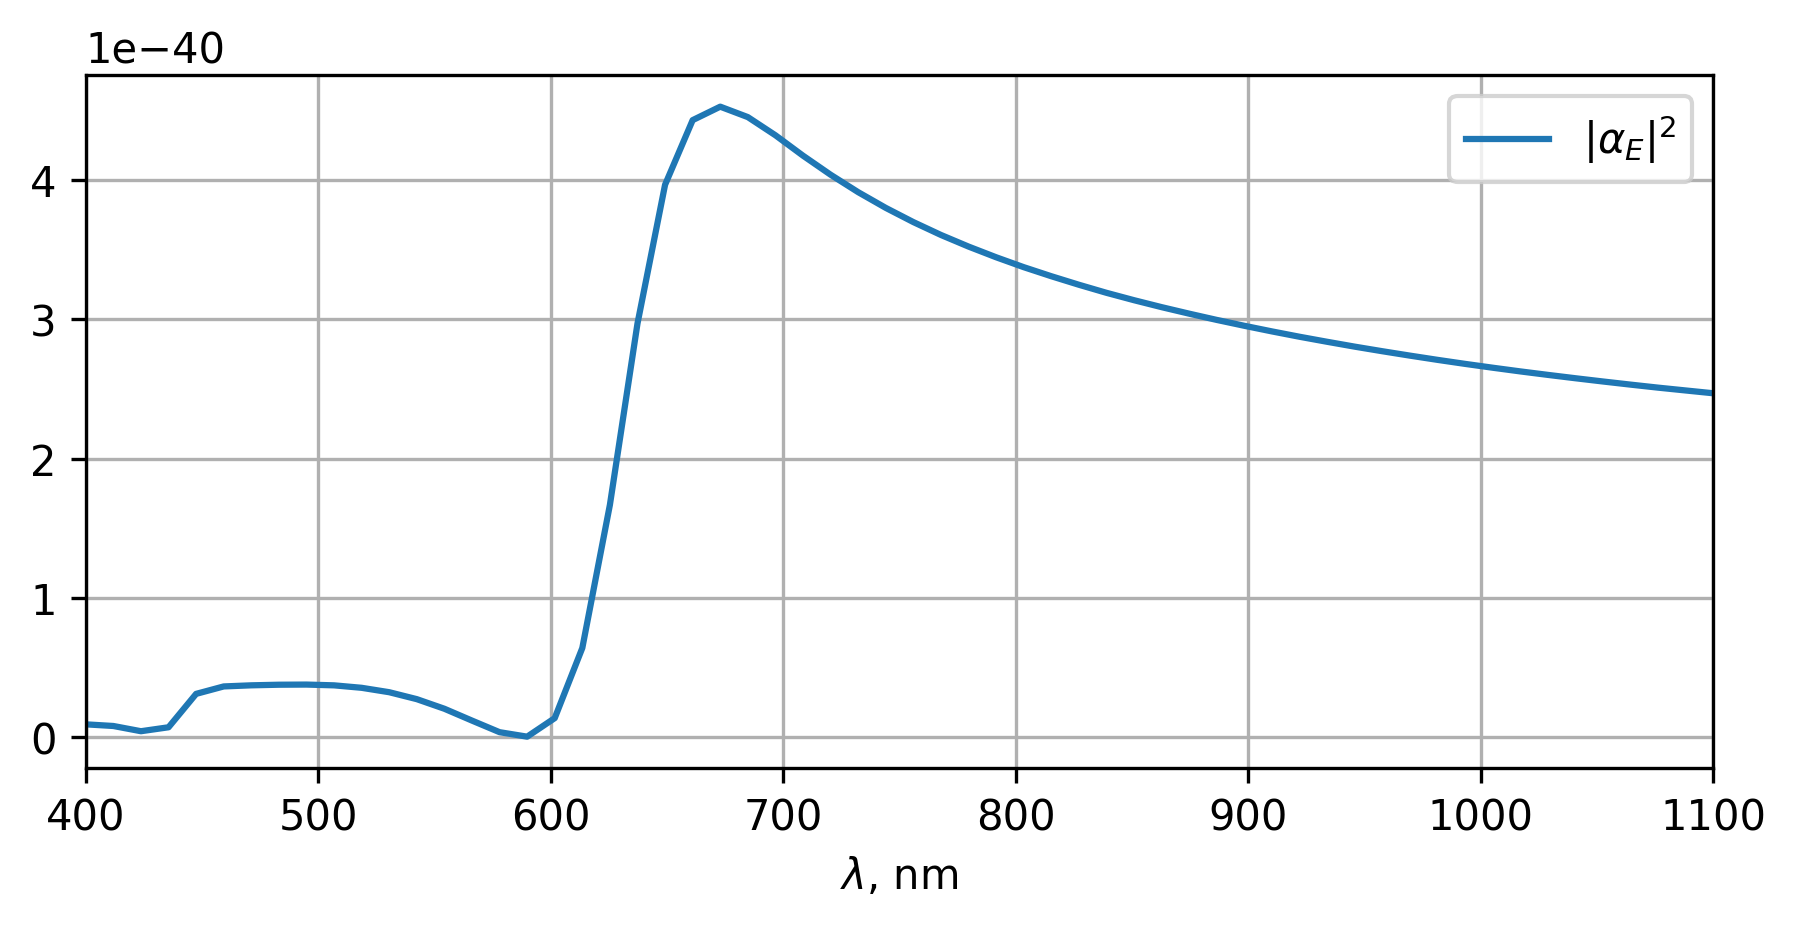

In [72]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.abs(AlphaEE(wls))**2, label='$|\\alpha_E|^2$')
plt.xlabel('$\lambda$, nm')
plt.xlim(wls[0], wls[-1])
plt.grid()
plt.legend()
plt.xlabel('$\lambda$, nm')
plt.show()

In [73]:
k0 = lambda wl: 2*np.pi/wl/1e-9
omega = lambda wl: 2*np.pi*c_const/wl/1e-9

In [74]:
dyGE_yz = np.zeros(len(wls), dtype=complex)
dyGH_yz,dyrotGHxz,dyrotGHzx = np.empty_like(dyGE_yz),  np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)
GExx, GEzz, GHxx, GHzz = np.empty_like(dyGE_yz),  np.empty_like(dyGE_yz), np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)
rotGExy, rotGEyx = np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)

for i in tqdm(range(len(wls))):
    dyGE, dyGH = green_func.dy_green_E_H(wls[i], point[2], eps_Au, STOP)
    dyrotGE, dyrotGH = green_func.dy_rot_green_E_H(wls[i], point[2], eps_Au, STOP)
    dyGE_yz[i] = dyGE[1,2]
    dyGH_yz[i] = dyGH[1,2]
    dyrotGHxz = dyrotGH[0,2]
    dyrotGHzx = dyrotGH[2,0]
    GE, GH = green_func.green_ref_00(wls[i], point[2], eps_Au, STOP)
    rotGE, _  = green_func.rot_green_ref_00(wls[i], point[2], eps_Au, STOP)
    GExx[i] = GE[0,0]
    GEzz[i] = GE[2,2]
    GHxx[i] = GH[0,0]
    GHzz[i] = GH[2,2]
    rotGExy[i] = rotGE[0,1]
    rotGEyx[i] = rotGE[1,0]

100%|██████████| 60/60 [00:00<00:00, 149618.45it/s]


In [75]:
GEExx = k0(wls)**2 * GExx/eps0_const
GEEzz = k0(wls)**2 * GEzz/eps0_const
GMMxx = k0(wls)**2 * GHxx
GMMzz = k0(wls)**2 * GHzz

GMExy =  - 1j* omega(wls) * rotGExy 
GMEyx =  - 1j* omega(wls) * rotGEyx
GEMxy = GMExy * mu0_const
GEMyx = GMEyx * mu0_const

In [76]:
def RP(eps_Au, angle):
    return lambda wl: frenel.reflection_coeff_v2(wl, eps_Au, angle)[0]
def RS(eps_Au, angle):
    return lambda wl: frenel.reflection_coeff_v2(wl, eps_Au, angle)[1]
def KZ(angle):
    return lambda wl: 2*np.pi/wl *np.cos(angle)

RPP = RP(eps_Au, angle)
RSS = RS(eps_Au, angle)
KZZ = KZ(angle)

In [77]:
def plt_set(wls):
    plt.grid()
    plt.xlabel('Wavelength [nm]')
    plt.xlim(wls[0], wls[-1])
    plt.legend()
    plt.tight_layout()

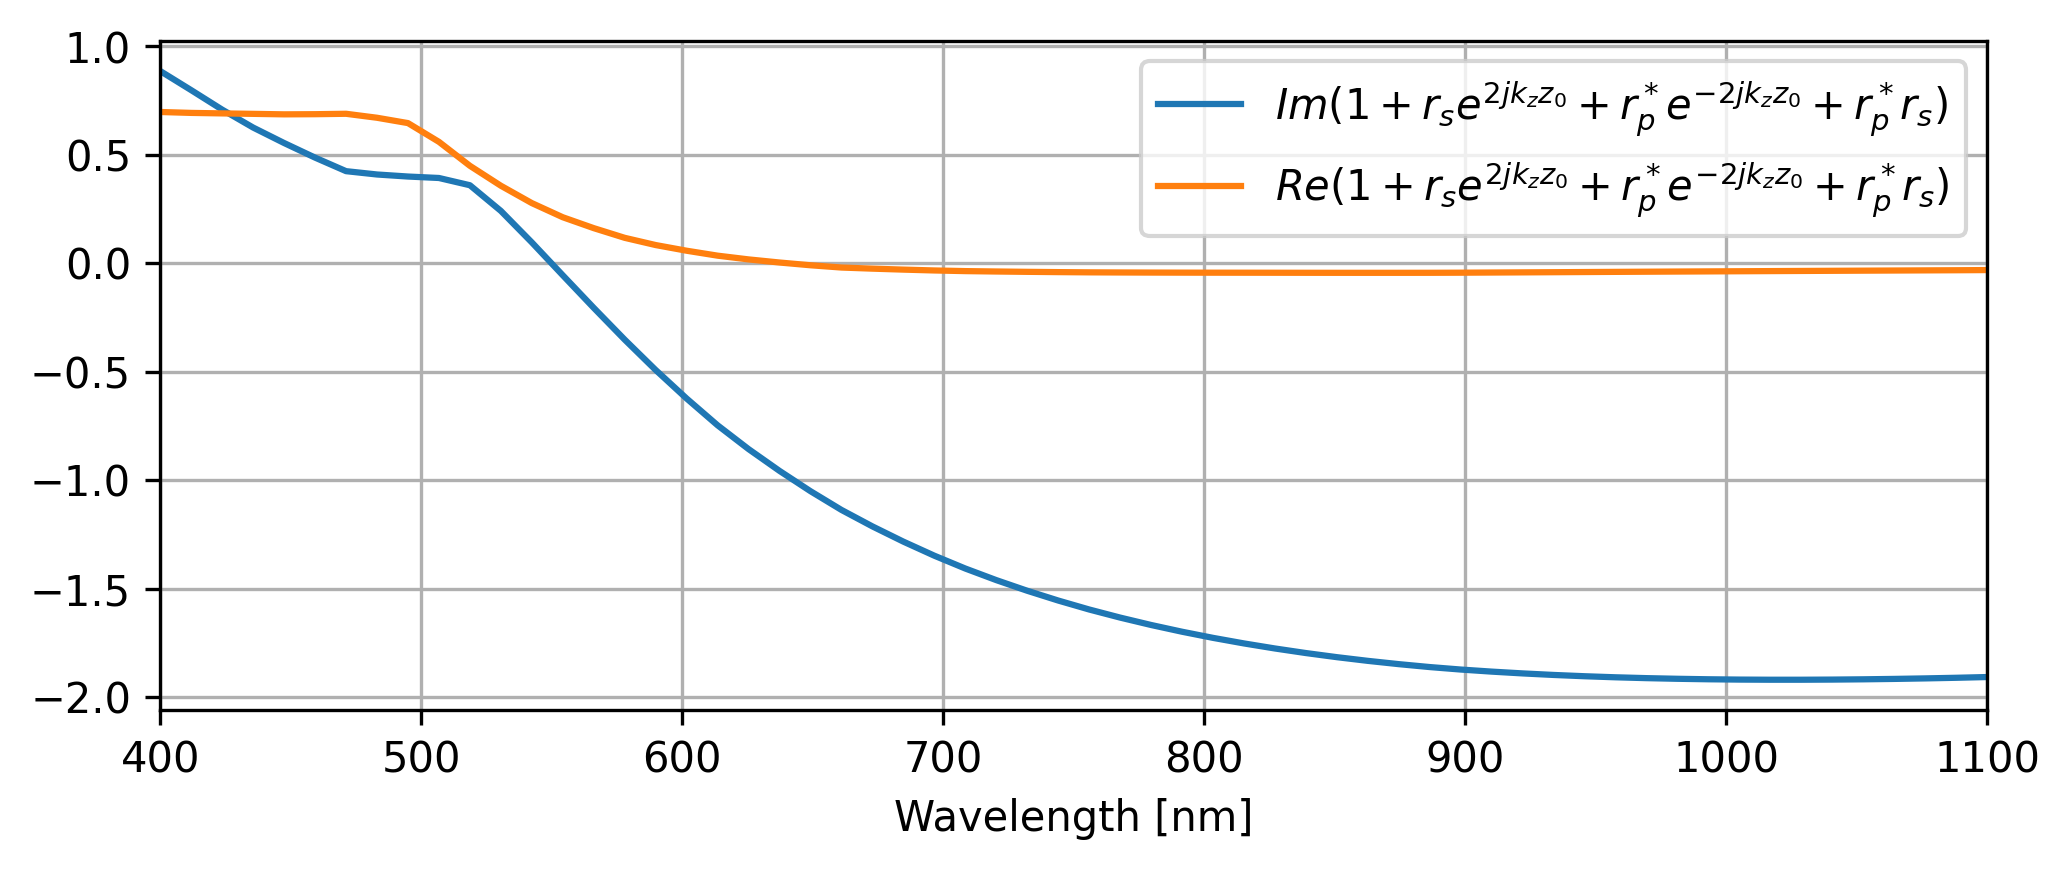

In [78]:
rp_conj_rs_py_pz_1 = 1+RPP(wls).conj() * np.exp(-2j*KZZ(wls)*z0) + RSS(wls)* np.exp(2j*KZZ(wls)*z0) + RPP(wls).conj()*RSS(wls)

plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.imag(rp_conj_rs_py_pz_1), label='$Im(1+r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} + r_p^* r_s)$')
plt.plot(wls, np.real(rp_conj_rs_py_pz_1), label='$Re(1+r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} + r_p^* r_s)$')
plt_set(wls)

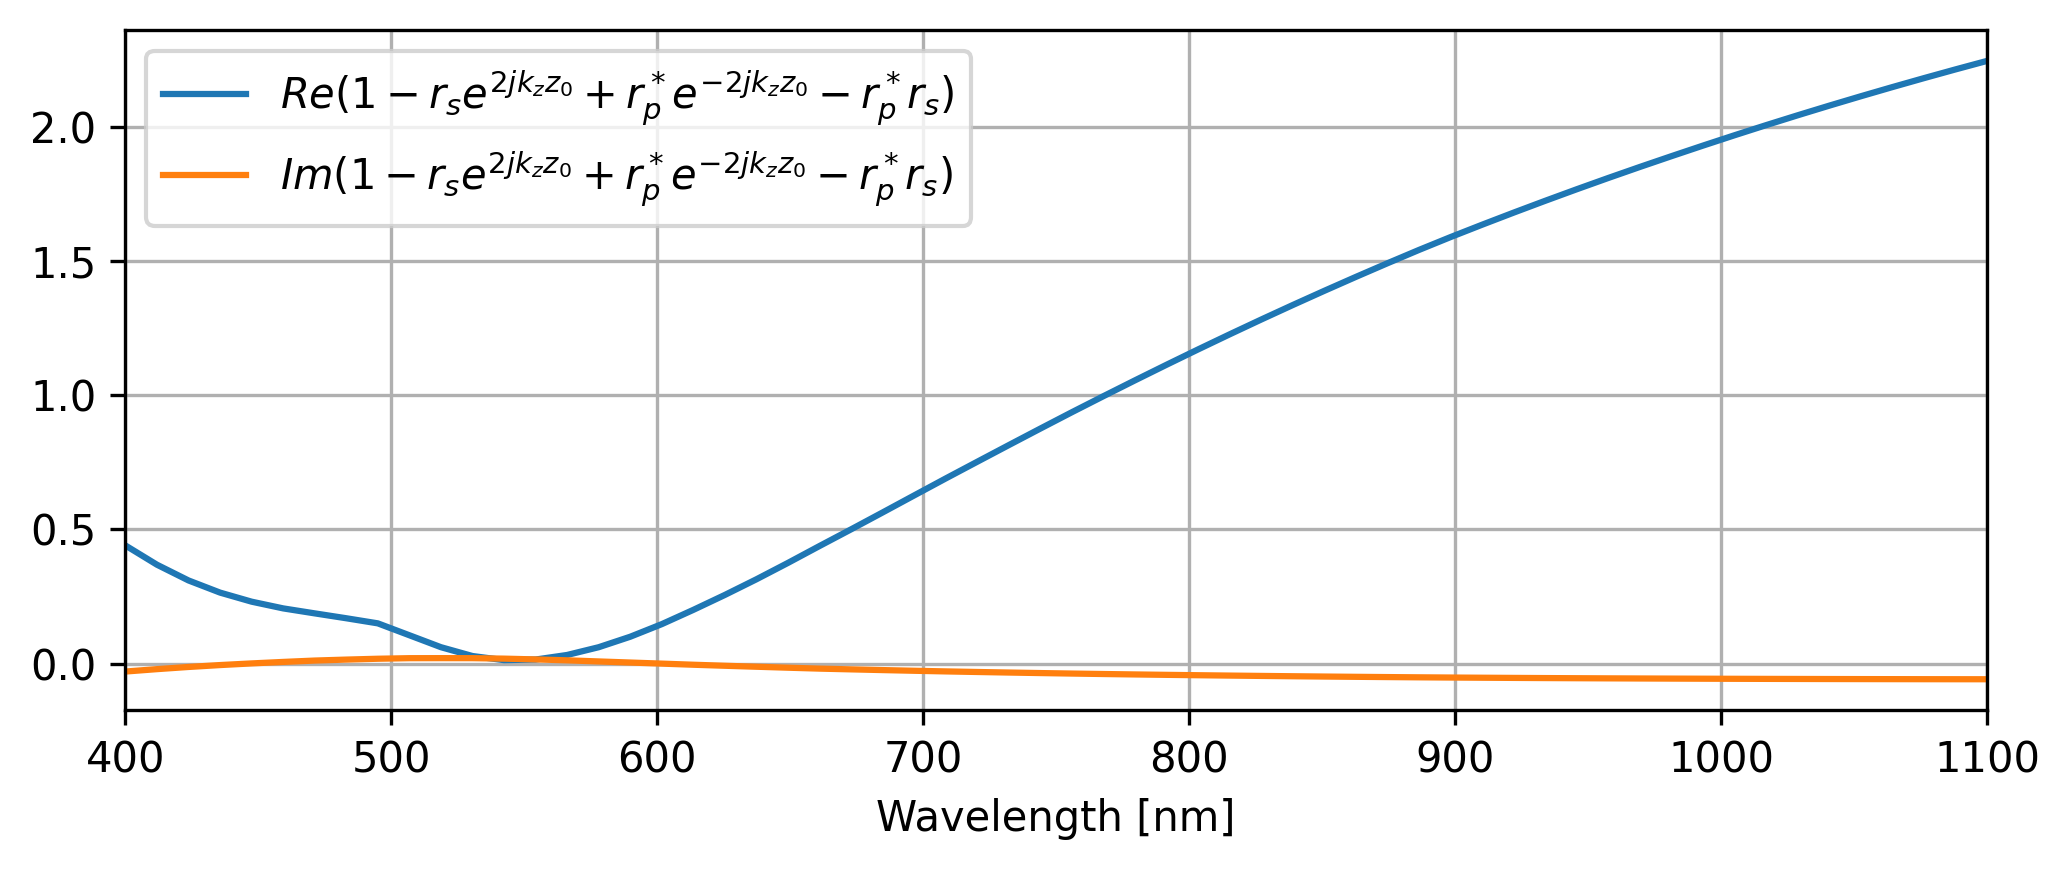

In [86]:
rp_conj_rs_py_pz_2= 1+RPP(wls).conj()*np.exp(-2j*KZZ(wls)*z0) - RSS(wls)*np.exp(2j*KZZ(wls)*z0) - RPP(wls).conj()*RSS(wls)

plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.real(rp_conj_rs_py_pz_2), label='$Re(1-r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} - r_p^* r_s)$')
plt.plot(wls, np.imag(rp_conj_rs_py_pz_2), label='$Im(1-r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} - r_p^* r_s)$')
plt_set(wls)

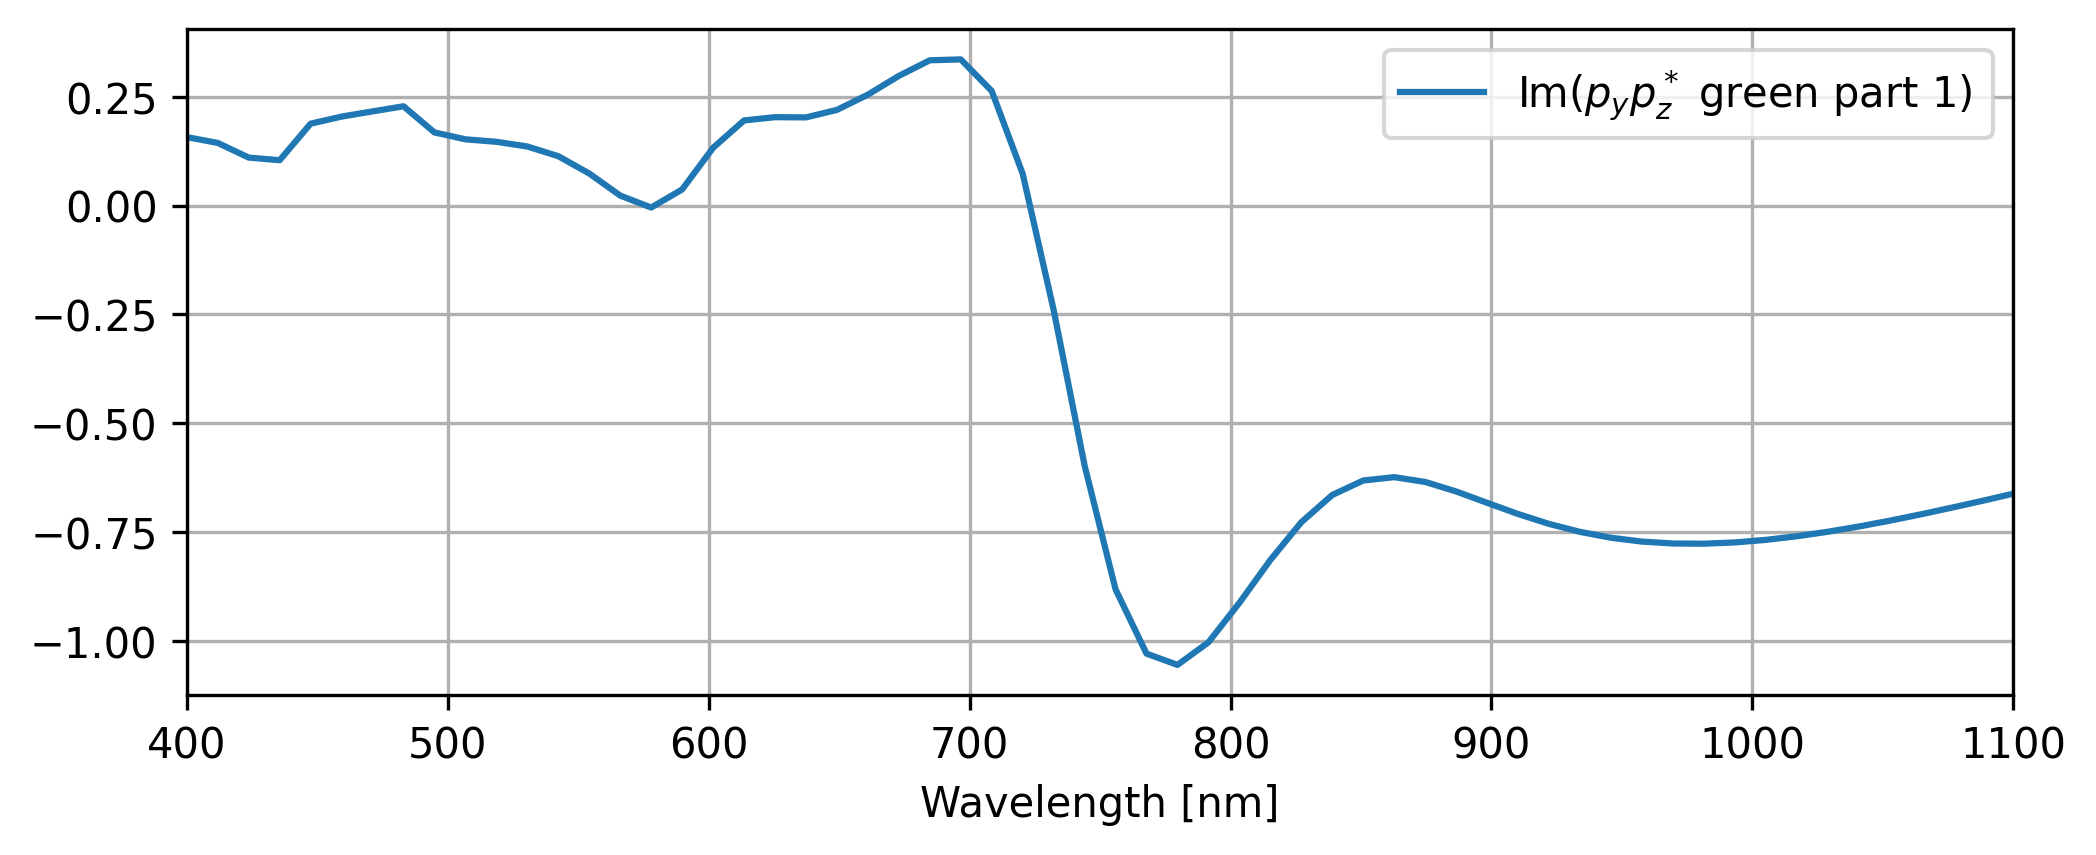

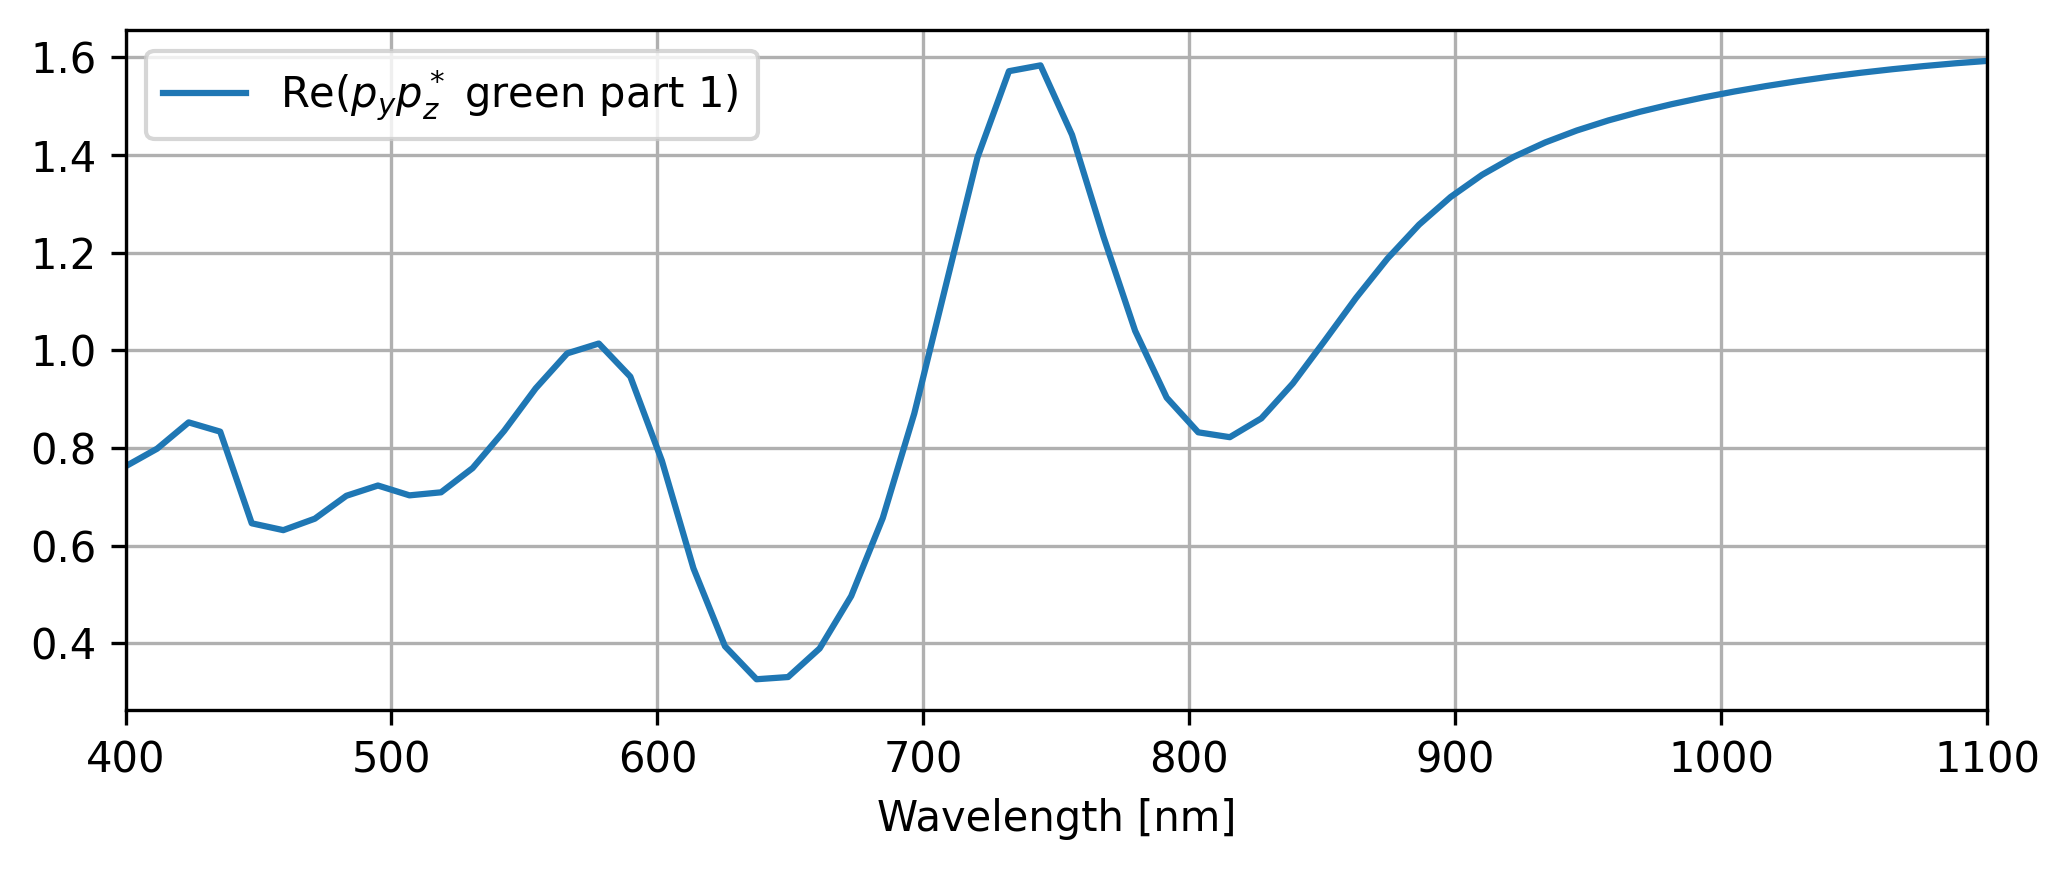

In [80]:
A = 1 - AlphaHH(wls)*GMMxx
C = 1 - AlphaEE(wls).conj()*eps0_const*GEEzz.conj()
B1 = 1 - AlphaHH(wls)*GMMxx
B2 = 1 - AlphaEE(wls)*eps0_const*GEExx
B3 = AlphaEE(wls)*eps0_const*AlphaHH(wls)*GMExy*GEMyx

plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.imag(A/(C*(B1*B2-B3))), label='Im($p_y p_z^*$ green part 1) ')
plt_set(wls)

plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.real(A/(C*(B1*B2-B3))), label='Re($p_y p_z^*$ green part 1) ')
plt_set(wls)


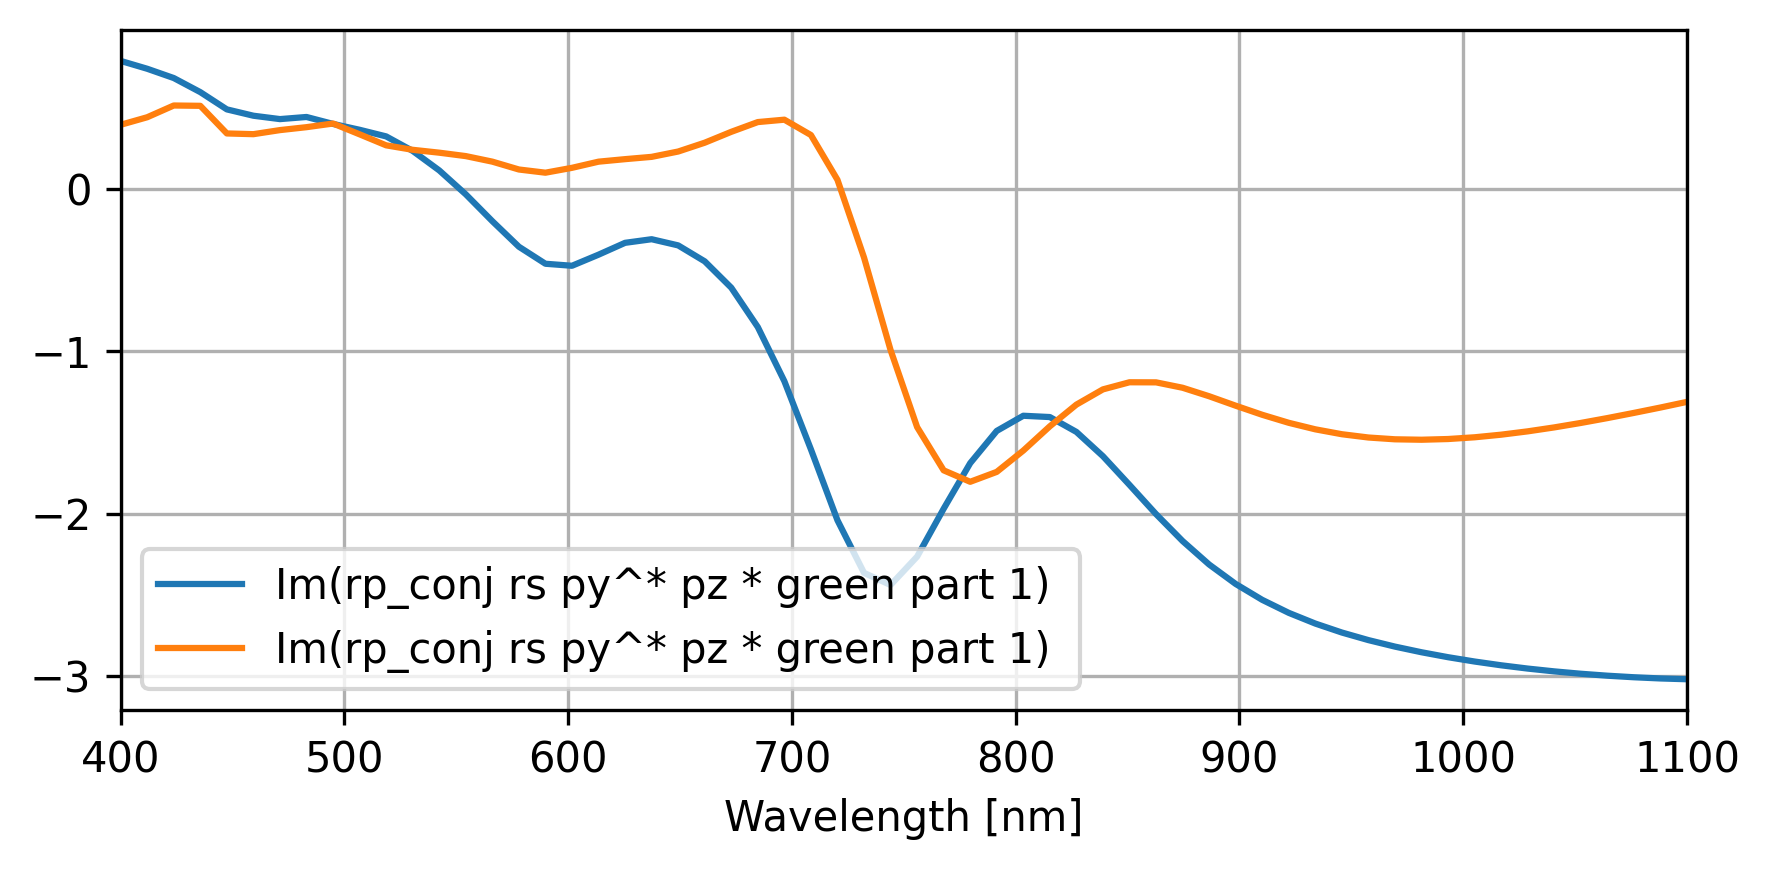

In [81]:
p_y_conj_pz_first_term = rp_conj_rs_py_pz_1*A/(C*(B1*B2-B3))
plt.figure(figsize=(6,3), dpi=300)
plt.plot(wls, np.imag(p_y_conj_pz_first_term), label='Im(rp_conj rs py^* pz * green part 1) ')
plt.plot(wls, np.real(p_y_conj_pz_first_term), label='Im(rp_conj rs py^* pz * green part 1) ')
plt_set(wls)

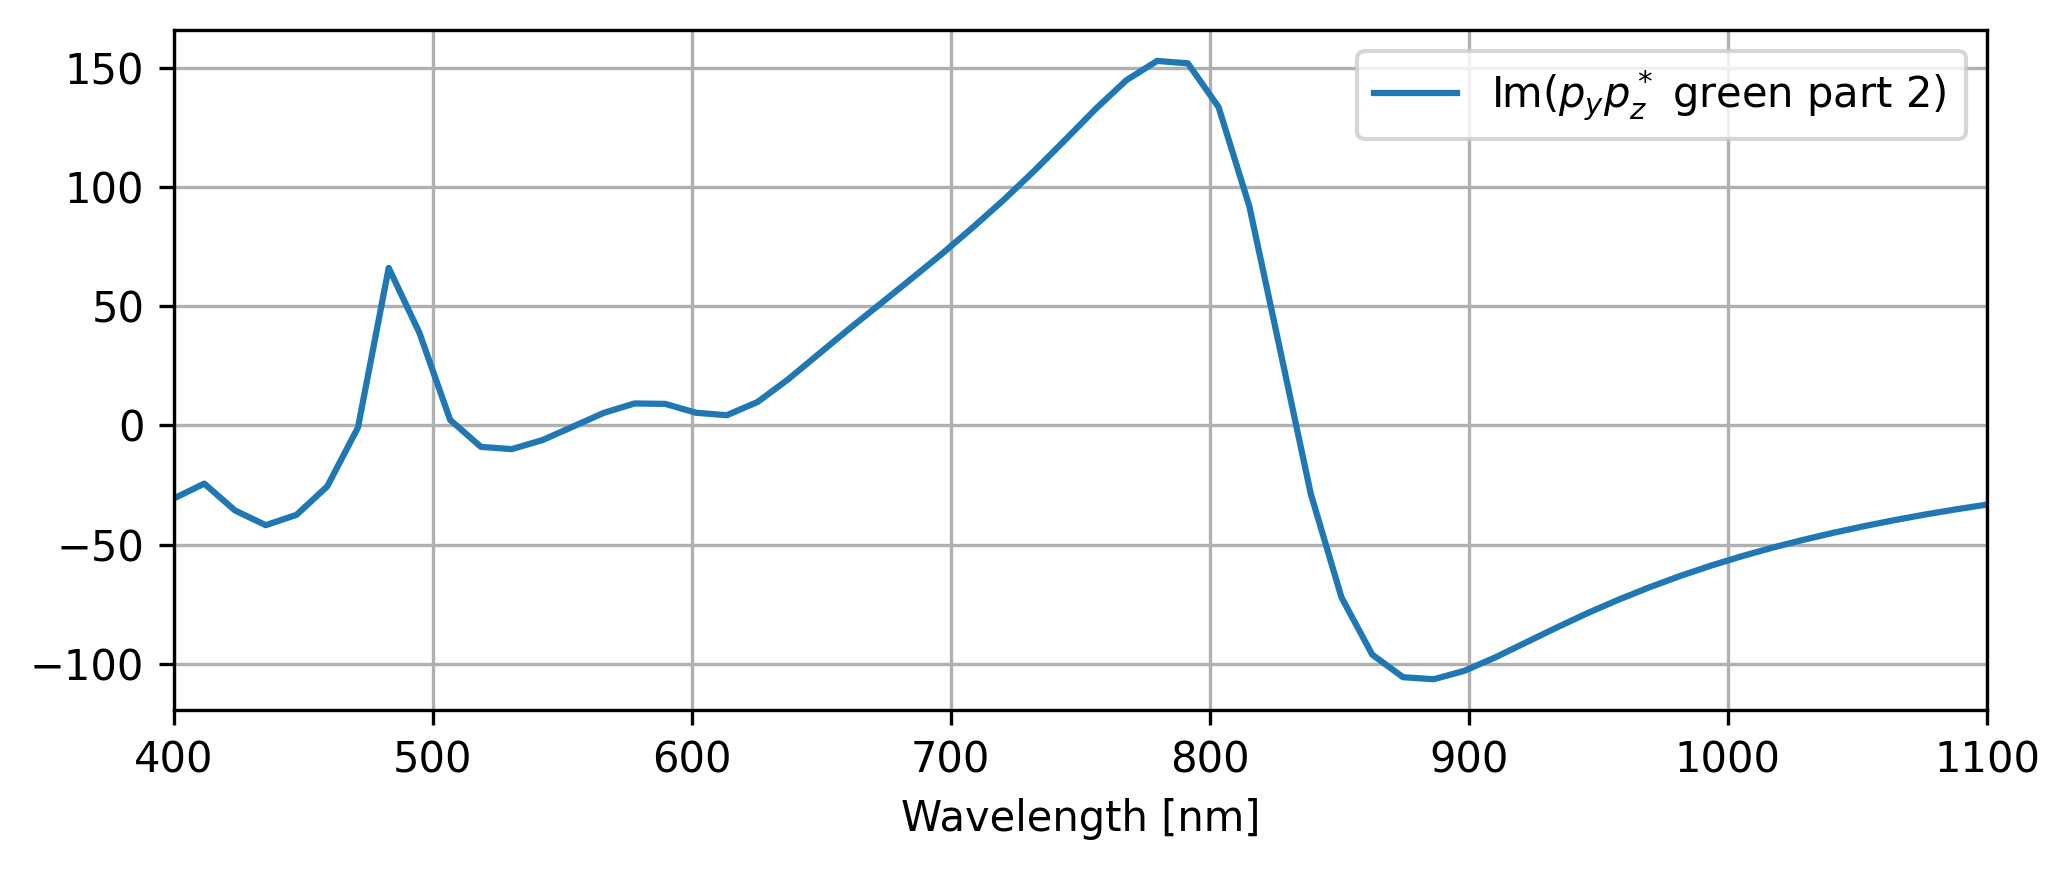

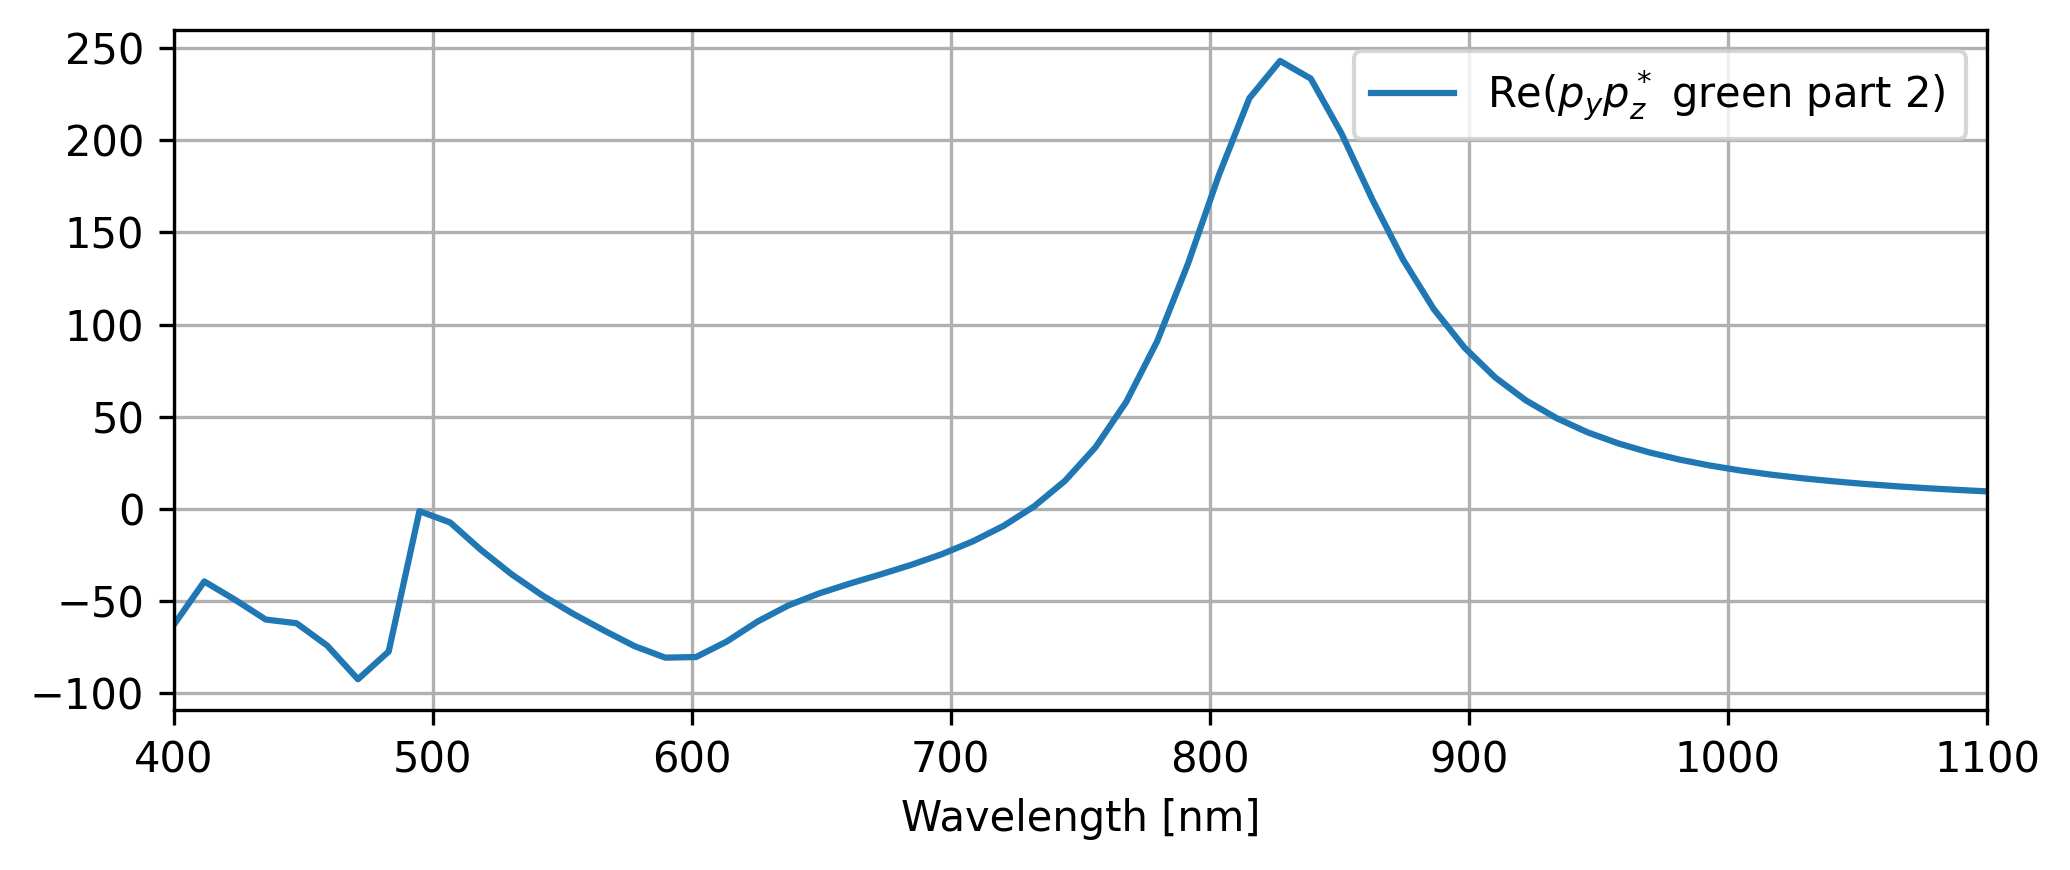

In [82]:
AA = AlphaHH(wls)*GEMyx
CC = 1 - AlphaEE(wls).conj() *eps0_const * GEEzz.conj()
BB1 = 1 - AlphaHH(wls)*GMMxx


plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.imag(AA/(CC*BB1)), label='Im($p_y p_z^*$ green part 2) ')
plt_set(wls)

plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.real(AA/(CC*BB1)), label='Re($p_y p_z^*$ green part 2) ')
plt_set(wls)

In [83]:
p_y_conj_pz_second_term = rp_conj_rs_py_pz_2 * AA/(CC*BB1)

/var/folders/rm/jp69z42j5kv7gm1yn340dwx80000gn/T/ipykernel_71653/634483884.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(-5e-64, 1.5e-62)

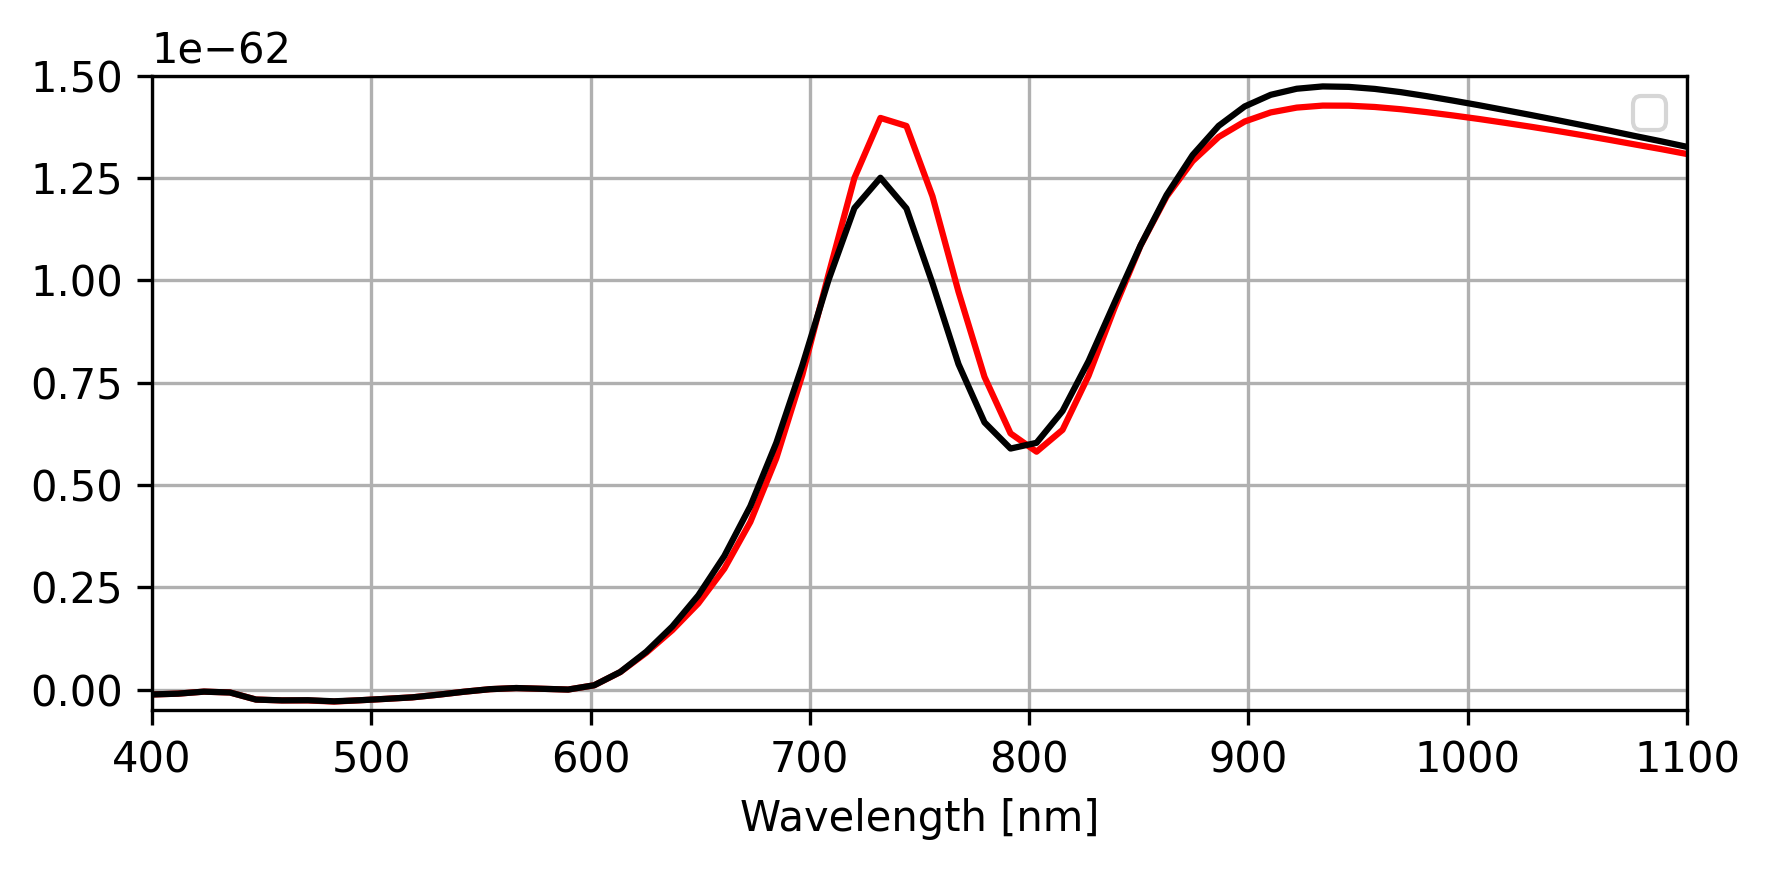

In [84]:
py_conj_pz_part_1 = - np.abs(AlphaEE(wls))**2  *eps0_const**2 * np.sin(2*a_angle)*np.sin(angle) /2 * np.imag(p_y_conj_pz_first_term)

py_conj_pz_part_2 = -np.abs(AlphaEE(wls))**2  *eps0_const**2 * k0(wls) * np.sin(2 * a_angle) * np.sin(2*angle)/4 /omega(wls)/mu0_const * np.imag(p_y_conj_pz_second_term)

plt.figure(figsize=(6,3), dpi=300)
# plt.plot(wls, py_conj_pz_part_1, c='b')
# plt.plot(wls, py_conj_pz_part_2, c='b')
plt.plot(wls, py_conj_pz_part_1+py_conj_pz_part_2, c='r')
plt.plot(wls, np.imag(P[:,1].conj()*P[:,2]), c='black')
plt_set(wls)

plt.ylim(-0.5e-63, 1.5e-62)

## Fe2+Fm2